In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('Titanic Dataset.csv')
imdb = pd.read_csv('imdb_top_1000.csv')
imdb = imdb.drop(columns = ['Poster_Link'])
imdb

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
#Creating bins of quantitative variables
min_age = data['Age'].min()
max_age = data['Age'].max()
bins = [0,15,30,45,60,75]
data['binned_age'] = pd.cut(data['Age'], bins)
print(data[['binned_age', 'Age']])

    binned_age   Age
0     (15, 30]  22.0
1     (30, 45]  38.0
2     (15, 30]  26.0
3     (30, 45]  35.0
4     (30, 45]  35.0
..         ...   ...
190   (30, 45]  32.0
191   (15, 30]  19.0
192   (15, 30]  19.0
193    (0, 15]   3.0
194   (30, 45]  44.0

[195 rows x 2 columns]


In [9]:
#Creating bar plot with quantitative bins and categorical variables
age_labels = ['Young', 'Young - Adult', 'Middle Aged', 'Middle - Older', 'Senior']
data['binned_age'] = pd.cut(data['Age'], bins, labels = age_labels)

<Axes: xlabel='binned_age'>

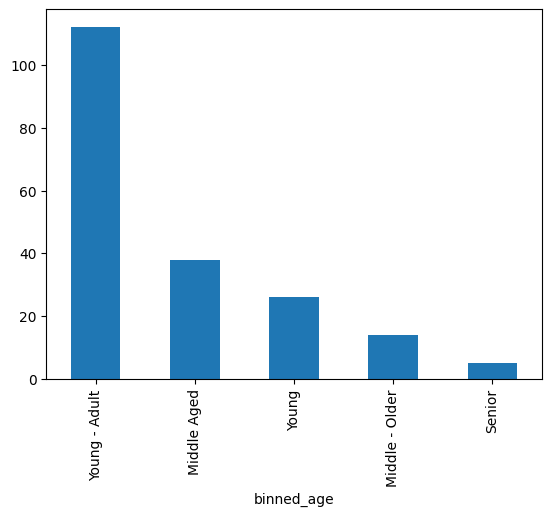

In [10]:
data['binned_age'].value_counts().plot(kind = 'bar', )

Distribution of: PassengerId
Skewness: 0.0
Distribution of: Survived
Skewness: 0.6638169086105521
Distribution of: Pclass
Skewness: -0.9054319786282495
Distribution of: Age
Skewness: 0.5704372384740456
Distribution of: SibSp
Skewness: 2.894729699006306
Distribution of: Parch
Skewness: 2.500922125591294
Distribution of: Fare
Skewness: 4.412832349846944


<Figure size 1200x1000 with 0 Axes>

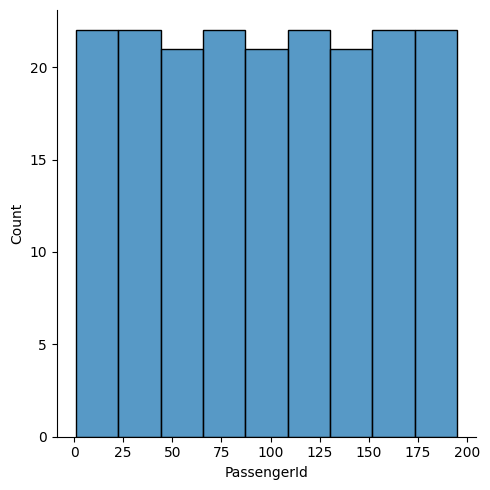

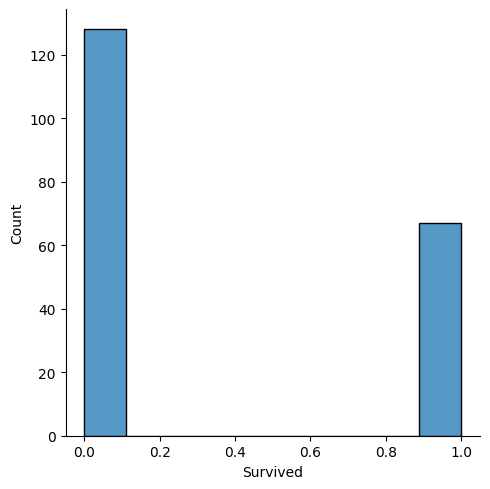

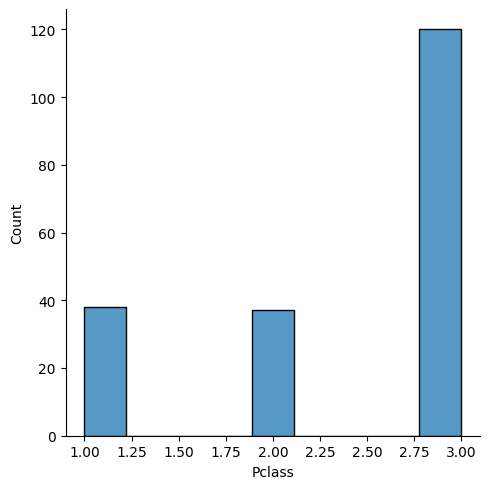

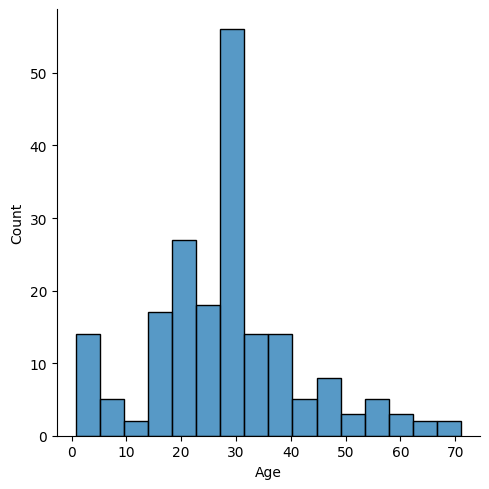

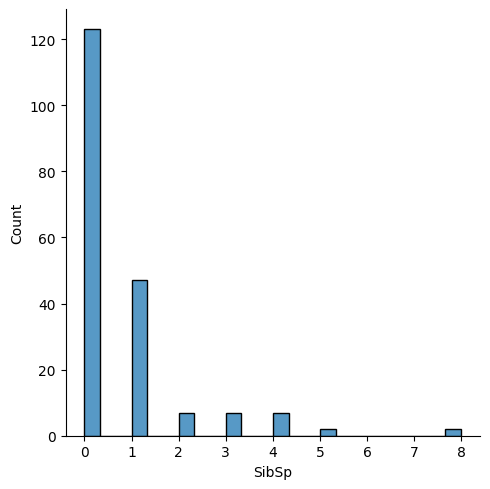

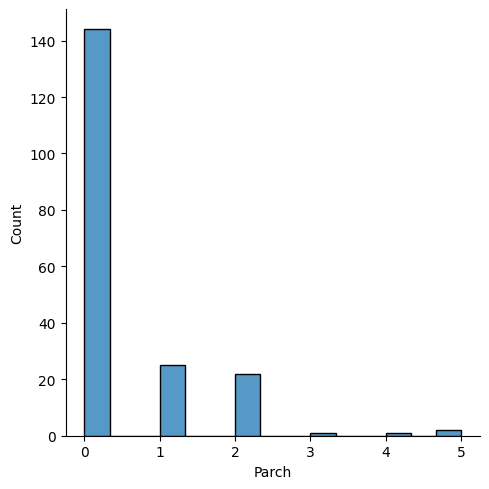

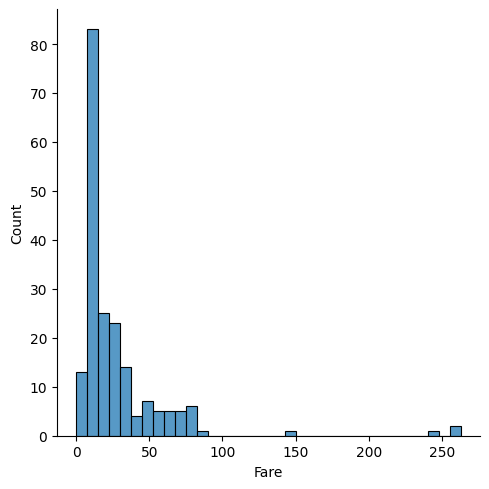

In [17]:
#Finding skew
figsize = plt.figure(figsize = (12,10))
labels = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for label in labels:
  print('Distribution of:', label)
  sns.displot(data[label])
  print('Skewness:', data[label].skew())

In [18]:
#Log
data['log_SibSp'] = np.log(data['SibSp'])
data['log_Parch'] = np.log(data['Parch'])
data['log_Fare'] = np.log(data['Fare'])
print(data['log_SibSp'])
print(data['log_Parch'])
print(data['log_Fare'])

0      0.0
1      0.0
2     -inf
3      0.0
4     -inf
      ... 
190   -inf
191   -inf
192    0.0
193    0.0
194   -inf
Name: log_SibSp, Length: 195, dtype: float64
0     -inf
1     -inf
2     -inf
3     -inf
4     -inf
      ... 
190   -inf
191   -inf
192   -inf
193    0.0
194   -inf
Name: log_Parch, Length: 195, dtype: float64
0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
190    2.564949
191    2.564949
192    2.061048
193    3.258097
194    3.322183
Name: log_Fare, Length: 195, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
#Association between two categorical variables
surv_gender = pd.crosstab(data['Survived'], data['Gender'])
surv_gender

Gender,female,male
Survived,,
0,19,109
1,49,18


In [30]:
cert = imdb['Certificate'].value_counts()
print(cert)

Certificate
U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64


In [41]:
mask = imdb.isin(cert[cert < 13].index)
imdb[mask] = 'Other'
print(imdb['Certificate'].value_counts())

Certificate
U         234
A         197
UA        175
R         146
PG-13      43
PG         37
Passed     34
Other      33
Name: count, dtype: int64


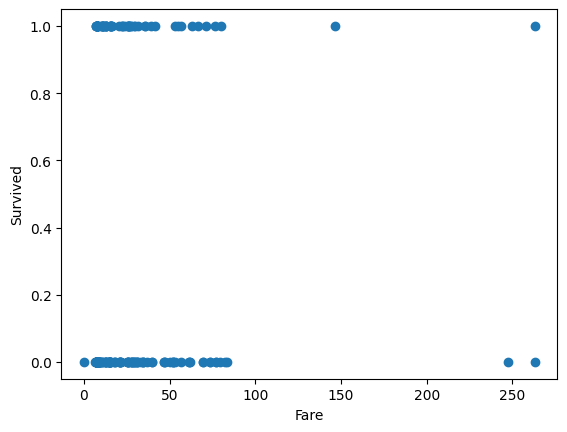

In [36]:
plt.scatter(x = data['Fare'], y = data['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

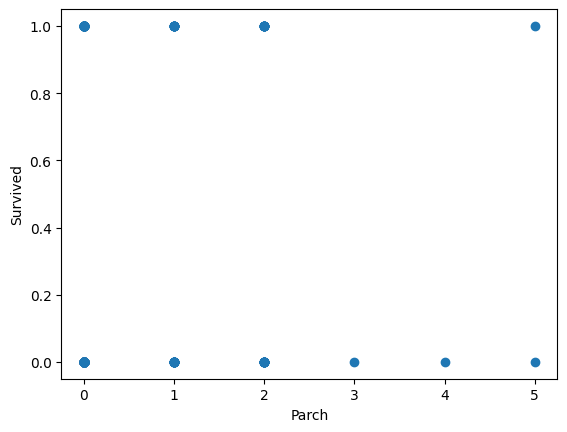

In [37]:
plt.scatter(x = data['Parch'], y = data['Survived'])
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.show()

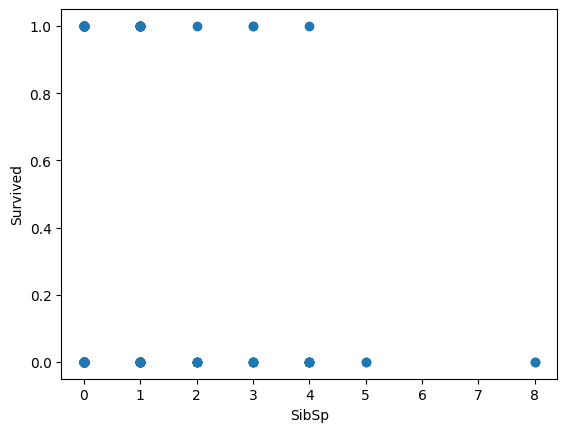

In [38]:
plt.scatter(x = data['SibSp'], y = data['Survived'])
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.show()